Γιωργος Χατζηλιγος ΑΜ 4835
Ερωτηση 2:

Βημα 1 : User Average (UA) και Item Average (IA)

In [1]:
#Libraries

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [16]:
#Step 0 : Load data from the csv to framework

train_model = pd.read_csv('data-train.csv' , names = ["user_id" , "movie_id" ,"rating"])
print(train_model)
test_model =pd.read_csv('data-test.csv' , names = ["user_id" , "movie_id" ,"rating"])
user_means_train = train_model.groupby("user_id")["rating"].mean()

test_model["prediction"] = test_model["user_id"].map(user_means_train)

global_mean = train_model["rating"].mean()
test_model["prediction"].fillna(global_mean , inplace = True)

rmse = np.sqrt(mean_squared_error(test_model["rating"] , test_model["prediction"]))

print(f"User Average RMSE: {rmse:.4f}")

       user_id  movie_id  rating
0            0         0       5
1            0         1       3
2            0         2       4
3            0         3       3
4            0         4       3
...        ...       ...     ...
90565      942      1046       2
90566      942      1073       4
90567      942      1187       3
90568      942      1227       3
90569      942      1329       3

[90570 rows x 3 columns]
User Average RMSE: 1.0431


In [35]:
#Step 1 : # 
# ---- UA(user average) ---- #
def UA(train_model,test_model):
    user_means_train = train_model.groupby("user_id")["rating"].mean()

    test_model["prediction"] = test_model["user_id"].map(user_means_train)

    global_mean = train_model["rating"].mean()
    test_model["prediction"].fillna(global_mean , inplace = True)

    rmse = np.sqrt(mean_squared_error(test_model["rating"] , test_model["prediction"]))

    print(f"User Average RMSE: {rmse:.4f}")

UA(train_model,test_model)


# ----- IA (Item Average) ----- #
def IA(train_model, test_model):
    item_means_train = train_model.groupby("movie_id")["rating"].mean()

    test_model["prediction"] = test_model["movie_id"].map(item_means_train)

    global_mean = train_model["rating"].mean()
    test_model["prediction"].fillna(global_mean, inplace=True)

    rmse = np.sqrt(mean_squared_error(test_model["rating"], test_model["prediction"]))

    print(f"Item Average RMSE: {rmse:.4f}")

IA(train_model, test_model)

User Average RMSE: 1.0431
Item Average RMSE: 1.0418


Βημα 2ο:


943


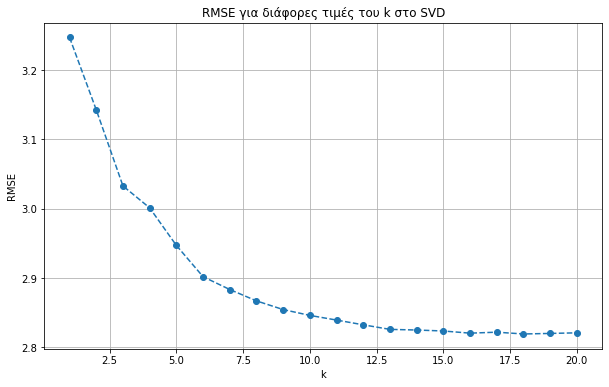

Η βέλτιστη τιμή του k είναι 18 με RMSE 2.8193


In [35]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


train_model = pd.read_csv('data-train.csv' , names = ["user_id" , "movie_id" ,"rating"])

test_model =pd.read_csv('data-test.csv' , names = ["user_id" , "movie_id" ,"rating"])

train_model['rating'] = train_model['rating'].astype(float)

num_users = train_model['user_id'].max()+1 # Take the num of users (how many rows)# 

num_movies= train_model['movie_id'].max()+1 # Take the num of users (how many rows)#

# Create the sparse matrix R #
R = csr_matrix((train_model['rating'], (train_model['user_id'], train_model['movie_id'])), 
               shape=(num_users, num_movies))

K = range(1,21) 
rmse_values = [] #an empty array just to put the results of the procedure#

U,s,Vt = svds(R , k=20)

s = np.diag(s)

for k in K :
    U_k = U[:,-k:] #k rows#
    s_k = s[-k : , -k:] #k bigger singular values #
    Vt_k = Vt[-k:,:]#k columns#


    #Compute R_k as says in the Excercise#
    R_k = np.dot(np.dot(U_k, s_k), Vt_k) # RK = Uk*Sk*Vtk
    R_k = np.clip(R_k,0,5)
    #Compute RMSE#
    test_predictions = [R_k[u, m] for u, m in zip(test_model['user_id'], test_model['movie_id'])]
    rmse = np.sqrt(mean_squared_error(test_model['rating'], test_predictions))
    rmse_values.append(rmse)


#Plot the in x_axis = k and y_axis = RMSE  #
plt.figure(figsize=(10, 6))
plt.plot(K, rmse_values, marker='o', linestyle='--')
plt.title('RMSE για διάφορες τιμές του k στο SVD')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.grid()
plt.show()

#Min of the RMSE and the Kth-value#
min_rmse = min(rmse_values)
optimal_k = K[rmse_values.index(min_rmse)]
print(f'Η βέλτιστη τιμή του k είναι {optimal_k} με RMSE {min_rmse:.4f}')



k=1, RMSE=3.2474
k=2, RMSE=3.1434
k=3, RMSE=3.0338
k=4, RMSE=3.0023
k=5, RMSE=2.9484
k=6, RMSE=2.9036
k=7, RMSE=2.8853
k=8, RMSE=2.8689
k=9, RMSE=2.8563
k=10, RMSE=2.8480
k=11, RMSE=2.8414
k=12, RMSE=2.8346
k=13, RMSE=2.8284
k=14, RMSE=2.8275
k=15, RMSE=2.8264
k=16, RMSE=2.8238
k=17, RMSE=2.8255
k=18, RMSE=2.8235
k=19, RMSE=2.8248
k=20, RMSE=2.8258


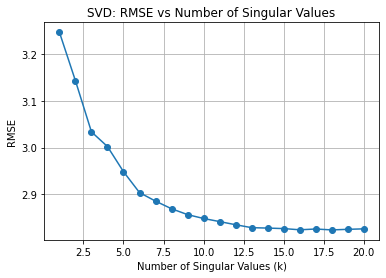

Best k: 18, Best RMSE: 2.8235


In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

def load_data(train_file, test_file):
    train = pd.read_csv(train_file, names=["user_id", "movie_id", "rating"])
    test = pd.read_csv(test_file, names=["user_id", "movie_id", "rating"])
    return train, test

train, test = load_data('data-train.csv', 'data-test.csv')

train["rating"] = train["rating"].astype(float)
test["rating"] = test["rating"].astype(float)



def svd(train, test, max_k=20):
    n_users = train["user_id"].max() + 1
    n_movies = train["movie_id"].max() + 1
    
    R = csr_matrix((train["rating"], (train["user_id"], train["movie_id"])), shape=(n_users, n_movies))
    
    rmse_values = []
    
    for k in range(1, max_k + 1):
        U, Sigma, Vt = svds(R, k=k)
        Sigma = np.diag(Sigma)
        
        Rk = np.dot(np.dot(U, Sigma), Vt)
        
        predictions = []
        for _, row in test.iterrows():
            u, i = int(row["user_id"]), int(row["movie_id"])
            pred = Rk[u, i] if u < Rk.shape[0] and i < Rk.shape[1] else np.mean(train["rating"])
            predictions.append(pred)
        
        test["prediction"] = predictions
        
        rmse = np.sqrt(mean_squared_error(test["rating"], test["prediction"]))
        rmse_values.append(rmse)
        print(f"k={k}, RMSE={rmse:.4f}")
    
    plt.plot(range(1, max_k + 1), rmse_values, marker='o')
    plt.xlabel('Number of Singular Values (k)')
    plt.ylabel('RMSE')
    plt.title('SVD: RMSE vs Number of Singular Values')
    plt.grid()
    plt.show()

    best_k_svd = np.argmin(rmse_values) + 1
    best_rmse_svd = min(rmse_values)
    print(f"Best k: {best_k_svd}, Best RMSE: {best_rmse_svd:.4f}")
    return best_k_svd, best_rmse_svd

best_k_svd, best_rmse = svd(train, test)


Βημα 3: 

Βημα 3.1 : 
user_mean(R,u) -> R = sparse matrix and u = user 

item_mean(R,u) -> R = sparse matrix and m = movie 

similar_users(R,u,m_users,k) ->  R = sparse matrix  , u = user , m_users με id_users , 
returns k most similar users with the user u

compute_score(k_ratings,k_similiraties) -> k_ratings = vector of k ratirngs for m movies, k_similiraties= similiraty with one user u 

Χρησιμοποιησα την random για τις τιμες u(user) και m(movie) ωστε να διαλεγει καθε φορα τυχαια μια ταινια και ενα χρηστη

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random 
from numpy.linalg import norm
from scipy.sparse.linalg import norm as sparse_norm


train_model = pd.read_csv('data-train.csv' , names = ["user_id" , "movie_id" ,"rating"])

test_model =pd.read_csv('data-test.csv' , names = ["user_id" , "movie_id" ,"rating"])

train_model['rating'] = train_model['rating'].astype(float)

num_users = train_model['user_id'].max()+1 # Take the num of users (how many rows)# 
#print(num_users)
num_movies= train_model['movie_id'].max()+1 # Take the num of users (how many rows)#

# Create the sparse matrix R #
R = csr_matrix((train_model['rating'], (train_model['user_id'], train_model['movie_id'])), 
               shape=(num_users, num_movies))


K = range(1,21) 

### ----- Function : user_mean(R,u) ------ ###

#I will choose a random user from R matrix and do the mean of ratings#
def user_mean(R,u):
    print("User : " , +u)
    user_ratings= R[u , :]
    print(user_ratings)
    return user_ratings.mean()

### ----- Function : item_user(R,m) ------ ###
def item_users(R,m):
    print("Movie : ", +m)
    users_rate_movie = R[:, m].nonzero()[0]
    print(users_rate_movie)
    return users_rate_movie


### ----- Function : similar_users_sparse(R, u, m_users, k) ------ ###
def similar_users_sparse(R, u, m_users, k):
    user_one_ratings = R.getrow(u)  
    similarities = []

    for user in m_users:
        user_many_ratings = R.getrow(user) 
       
        dot_product = user_one_ratings.dot(user_many_ratings.T).data
        norm_one_user = np.sqrt(user_one_ratings.multiply(user_one_ratings).sum())
        norm_many_user = np.sqrt(user_many_ratings.multiply(user_many_ratings).sum())
        
        if dot_product.size > 0 and norm_one_user > 0 and norm_many_user > 0:
            similarity = dot_product[0] / (norm_one_user * norm_many_user)
        else:
            similarity = 0

        similarities.append(similarity)

    similarities = np.array(similarities)
    top_k_indices = np.argsort(similarities)[::-1][:k]  

    top_k_users = np.array(m_users)[top_k_indices]  
    top_k_similarities = similarities[top_k_indices] 

    return top_k_users, top_k_similarities
### ----- Function : compute_scope(k_ratings, k_similiraties) ------ ###


def compute_scope(k_ratings, k_similiraties):

    x1 = np.sum(k_ratings * k_similiraties)
    x2 = np.sum(k_similiraties)
    res = x1/x2 
    return res 

num_users = R.shape[0]
u = np.random.randint(0,num_users) #Random index between users #

num_of_movies = R.shape[1]
m= np.random.randint(0,num_of_movies) #Random index between users #

k = 5
m_users = item_users(R,m)

top_k_users, top_k_similarities = similar_users_sparse(R, u, m_users, k)

print("Χρήστης u:", u)
print("Ταινία m:", m)
print("Χρήστες που βαθμολόγησαν την ταινία m:", m_users)
print("Top-k χρήστες:", top_k_users)
print("Ομοιότητες:", top_k_similarities)

top_k_ratings = R[top_k_users, m].toarray().flatten()
score = compute_scope(top_k_ratings , top_k_similarities)

print("Score : " , score)


Βημα 4.2:

Τυχαία επιλογή: User ID = 1, Movie ID = 12, Actual Rating = 4
Βέλτιστη τιμή του k: 100 με RMSE: 0.7767363848002441
k=1: Predicted Rating=3.00
k=2: Predicted Rating=3.00
k=3: Predicted Rating=3.32
k=5: Predicted Rating=3.39
k=10: Predicted Rating=3.10
k=20: Predicted Rating=3.19
k=30: Predicted Rating=3.13
k=40: Predicted Rating=3.31
k=50: Predicted Rating=3.23
k=60: Predicted Rating=3.26
k=70: Predicted Rating=3.31
k=80: Predicted Rating=3.32
k=90: Predicted Rating=3.35
k=100: Predicted Rating=3.35


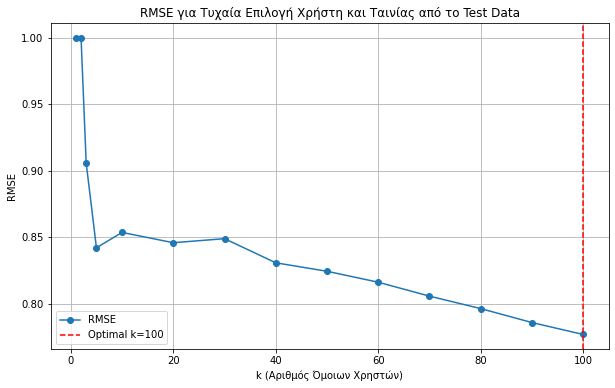

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import random

def ucf_algorithm(R, u, m, k):
    # 1. Βρίσκουμε τους χρήστες που έχουν βαθμολογήσει την ταινία 𝑚
    m_users = item_users(R, m)
    if len(m_users) == 0:
        return user_mean(R, u)

    top_k_users, top_k_similarities = similar_users_sparse(R, u, m_users, k)

    if np.sum(top_k_similarities) == 0:
        return 0

    top_k_ratings = R[top_k_users, m].toarray().flatten()
    score = compute_scope(top_k_ratings, top_k_similarities)

    return score

def compute_rmse(predictions, actuals):
    return np.sqrt(mean_squared_error(actuals, predictions))

def run_ucf_for_k_values(R, test_data, k_values):
    rmse_values = []
    predictions = []
    actual_ratings = []

    u = random.choice(test_data['user_id'].unique())

    user_movies = test_data[test_data['user_id'] == u]

    random_movie = user_movies.sample(n=1)
    m = int(random_movie['movie_id'].iloc[0])  # Movie ID
    actual_rating = random_movie['rating'].iloc[0]  # Actual rating

    print(f"Τυχαία επιλογή: User ID = {u}, Movie ID = {m}, Actual Rating = {actual_rating}")


    # Για κάθε τιμή του k
    for k in k_values:
        # Υπολογισμός της εκτιμώμενης βαθμολογίας για τον συγκεκριμένο χρήστη και ταινία
        predicted_rating = ucf_algorithm(R, u, m, k)
        predictions.append(predicted_rating)
        actual_ratings.append(actual_rating)

        # Υπολογισμός RMSE για τη συγκεκριμένη τιμή του k
        rmse = compute_rmse(predictions, actual_ratings)
        rmse_values.append(rmse)

    return rmse_values, predictions



train_model = pd.read_csv('data-train.csv' , names = ["user_id" , "movie_id" ,"rating"])

test_model =pd.read_csv('data-test.csv' , names = ["user_id" , "movie_id" ,"rating"])

train_model['rating'] = train_model['rating'].astype(float)

num_users = train_model['user_id'].max()+1 # Take the num of users (how many rows)# 
num_movies= train_model['movie_id'].max()+1 # Take the num of users (how many rows)#
k_values = [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

rmse_values, predictions = run_ucf_for_k_values(R, test_model, k_values)

min_rmse = min(rmse_values)
optimal_k = k_values[rmse_values.index(min_rmse)]

print(f"Βέλτιστη τιμή του k: {optimal_k} με RMSE: {min_rmse}")

for k, pred in zip(k_values, predictions):
    print(f"k={k}: Predicted Rating={pred:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', label='RMSE')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('k (Αριθμός Όμοιων Χρηστών)')
plt.ylabel('RMSE')
plt.title('RMSE για Τυχαία Επιλογή Χρήστη και Ταινίας από το Test Data')
plt.legend()
plt.grid(True)
plt.show()


Βημα 4.3 : 

Βέλτιστη τιμή του k: 3 με RMSE: 2.0060367740901706


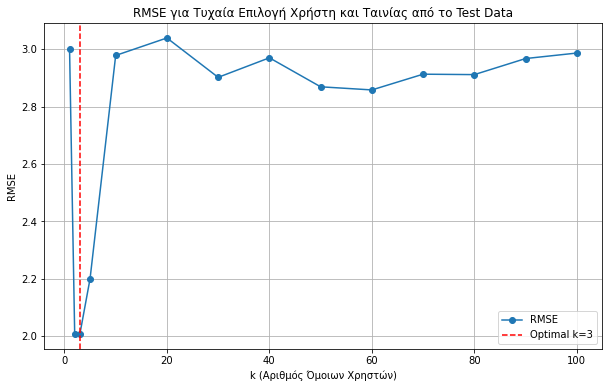

In [46]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix



def ucf_algorithm_optimized(R, u, m, k_values):
    m_users = item_users(R, m)
    if len(m_users) == 0:
        return {k: user_mean(R, u) for k in k_values}

    predictions = {}
    for k in k_values:
        top_k_users, top_k_similarities = similar_users_sparse(R, u, m_users, k)

        if np.sum(top_k_similarities) == 0:
            predictions[k] = 0
        else:
            top_k_ratings = R[top_k_users, m].toarray().flatten()
            predictions[k] = compute_scope(top_k_ratings, top_k_similarities)

    return predictions

def compute_rmse(predictions, actuals):
    return np.sqrt(mean_squared_error(actuals, predictions))

# Παράδειγμα εκτέλεσης
train_model = pd.read_csv('data-train.csv', names=["user_id", "movie_id", "rating"])
test_model = pd.read_csv('data-test.csv', names=["user_id", "movie_id", "rating"])
train_model['rating'] = train_model['rating'].astype(float)

num_users = train_model['user_id'].max() + 1
num_movies = train_model['movie_id'].max() + 1

R = csr_matrix((train_model['rating'], (train_model['user_id'], train_model['movie_id'])), shape=(num_users, num_movies))
k_values = [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

u = random.choice(test_model['user_id'].unique())
user_movies = test_model[test_model['user_id'] == u]
random_movie = user_movies.sample(n=1)
m = int(random_movie['movie_id'].iloc[0])
actual_rating = random_movie['rating'].iloc[0]

predictions = ucf_algorithm_optimized(R, u, m, k_values)

rmse_values = [compute_rmse([predictions[k]], [actual_rating]) for k in k_values]
min_rmse = min(rmse_values)
optimal_k = k_values[rmse_values.index(min_rmse)]

print(f"Βέλτιστη τιμή του k: {optimal_k} με RMSE: {min_rmse}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', label='RMSE')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('k (Αριθμός Όμοιων Χρηστών)')
plt.ylabel('RMSE')
plt.title('RMSE για Τυχαία Επιλογή Χρήστη και Ταινίας από το Test Data')
plt.legend()
plt.grid(True)
plt.show()


Βημα 5 : Αξιολογηση των αλγοριθμων 